# Gauss-Newton-Verfahren (ohne / mit Dämpfung)

#### Erstellt von F. De Lorenzi / R. Knaack, 30.03.2021 für die Vorlesung Höhere Mathematik 2 der ZHAW SoE

In diesem Tutorial geht es um die Lösung der folgenden Aufgabe:

Ein gedämpftes mechanisches System mit rückstellenden Kräften (z.B. ein gedämpftes Federpendel, siehe Abbildung) wird für eine Punktmasse $m$ durch die Differentialgleichung $$m\ddot{x}+c\dot{x}+kx=0$$ beschrieben ($c$ ist die Dämpfungskonstante, $k$ die Federkonstante der rückstellenden Kraft). Lösungen dieser DGL haben die Form $$x(t)=x_{0}\textrm{e}^{-\alpha t}\sin(\omega t+\varphi_{0}),$$ wobei $x_{0}$ die Anfangsamplitude, $\alpha$ die Abklingkonstante, $\omega$ die Kreisfrequenz und $\varphi_{0}$ den Nullphasenwinkel bezeichnet. Eine Messung ergibt nun die folgenden Werte

\begin{array}{c|cccccccccc|}
  t \,  [s] & 0.1 & 0.3 & 0.7 & 1.2 & 1.6 & 2.2 & 2.7 & 3.1 & 3.5 & 3.9 \\\hline
  x_i\, [m] & 0.558 & 0.569 & 0.176 & -0.207 & -0.133 & 0.132 & 0.055 & -0.090 & -0.069 & 0.027 \\
\end{array}

Arbeiten Sie diese Tutorial durch, welches Ihnen die folgenden Aufgaben einmal für das ungedämpfte Gauss-Newton und dann noch für das gedämpfte Verfahren löst. Füllen Sie die Lücken mit Ihrem eigenen Code, wo nötig.

a) Berechnen Sie den ersten Schritt des (ungedämpften) Gauss-Newton Verfahrens für den Startwert $\lambda^{(0)}=(1,2,2,1)^{T}$.

b) Bestimmen Sie die 4 Parameter $x_{0},\alpha,\omega,\varphi_{0}$ mit dem Gauss-Newton Verfahren (ohne Dämpfung) für den gleichen Startwert $\lambda^{(0)}$ auf eine Genauigkeit von 1e-5. Plotten Sie die Messpunkte sowie Ihre Lösung für x(t) ins gleiche Grafikfenster.

c) Lösen Sie die Aufgabe b) nochmals mit dem gedämpften Gauss-Newton Verfahren.

d) Vergleichen Sie die Resultate aus b) und c) für einen anderen Startvektor $\lambda^{(0)}=(2,2,2,2)^{T}$

e) Probieren Sie die Python-Funktion scypy.optimize.fmin() (siehe [Online-Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html), indem Sie damit direkt das Minimum des Fehlerfunktionals suchen, und vergleichen Sie mit Ihrer Lösung aus d).

<img src="Mass_spring_damper.png" width=300 height=300 />

## Aufgabe a)
Berechnen Sie den ersten Schritt des (ungedämpften) Gauss-Newton Verfahrens für den Startwert $\lambda^{(0)}=(1,2,2,1)^{T}$.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp.init_printing()

- Eingabe der Daten. Achtung: die $t$-Werte der obigen Tabelle werden hier in $x$ unbenannt, die $x$-Werte der obigen Tabelle in $y$. Wie im Skript.

In [3]:
x = np.array([0.1, 0.3, 0.7, 1.2, 1.6, 2.2, 2.7, 3.1, 3.5, 3.9], dtype=np.float64)
y = np.array([0.558, 0.569, 0.176, -0.207, -0.133, 0.132, 0.055, -0.090, -0.069, 0.027], dtype=np.float64)

- Definition des Anfansvektors $\boldsymbol{\lambda}^{(0)}=[1,2,2,1]$, der gewünschten Genauigkeit $tol$ und der symbolischen Variablen. Die symbolischen Variablen ensprechen den gesuchten Parametern $x_{0}$, $\alpha$, $\omega$ und $\varphi_{0}$. Der Einfachheit halber nennen wir hier die Komponenten $p_i$ und schreiben sie in die Liste $p$, mit p[0]=$x_{0}$, p[1]=$\alpha$, p[2]=$\omega$ und p[3]=$\varphi_{0}$. Achtung: der Einfachheit halber wird $\boldsymbol{\lambda}^{(0)}$ nicht als Spaltenvektor definiert.

In [4]:
lam0 = np.array([1, 2, 2, 1],dtype=np.float64)
tol = 1e-5

p = sp.symbols('p0 p1 p2 p3')
# oder eleganter: 
# p = sp.symbols('p:{n:d}'.format(n=lam.size))
p

- Definition der Ansatzfunktion $$\boldsymbol{f(x)}:$$

In [5]:
def f(x,p):
    return (p[0]*sp.exp(-p[1]*x)*sp.sin(p[2]*x+p[3]))

- Definition der Funktion $$\boldsymbol{g(x)=y-f(x)}:$$

In [6]:
g = sp.Matrix([y[k]-f(x[k],p) for k in range(len(x))])
g

⎡      -0.1⋅p₁                         ⎤
⎢- p₀⋅ℯ       ⋅sin(0.1⋅p₂ + p₃) + 0.558⎥
⎢                                      ⎥
⎢      -0.3⋅p₁                         ⎥
⎢- p₀⋅ℯ       ⋅sin(0.3⋅p₂ + p₃) + 0.569⎥
⎢                                      ⎥
⎢      -0.7⋅p₁                         ⎥
⎢- p₀⋅ℯ       ⋅sin(0.7⋅p₂ + p₃) + 0.176⎥
⎢                                      ⎥
⎢      -1.2⋅p₁                         ⎥
⎢- p₀⋅ℯ       ⋅sin(1.2⋅p₂ + p₃) - 0.207⎥
⎢                                      ⎥
⎢      -1.6⋅p₁                         ⎥
⎢- p₀⋅ℯ       ⋅sin(1.6⋅p₂ + p₃) - 0.133⎥
⎢                                      ⎥
⎢      -2.2⋅p₁                         ⎥
⎢- p₀⋅ℯ       ⋅sin(2.2⋅p₂ + p₃) + 0.132⎥
⎢                                      ⎥
⎢      -2.7⋅p₁                         ⎥
⎢- p₀⋅ℯ       ⋅sin(2.7⋅p₂ + p₃) + 0.055⎥
⎢                                      ⎥
⎢      -3.1⋅p₁                         ⎥
⎢- p₀⋅ℯ       ⋅sin(3.1⋅p₂ + p₃) - 0.09 ⎥
⎢                                      ⎥
⎢      -3.5⋅p₁  

- Berechnung der Jacobi-Matrix $$\boldsymbol{Dg(x)}:$$

In [7]:
Dg = g.jacobian(p)
Dg

⎡  -0.1⋅p₁                           -0.1⋅p₁                            -0.1⋅p
⎢-ℯ       ⋅sin(0.1⋅p₂ + p₃)  0.1⋅p₀⋅ℯ       ⋅sin(0.1⋅p₂ + p₃)  -0.1⋅p₀⋅ℯ      
⎢                                                                             
⎢  -0.3⋅p₁                           -0.3⋅p₁                            -0.3⋅p
⎢-ℯ       ⋅sin(0.3⋅p₂ + p₃)  0.3⋅p₀⋅ℯ       ⋅sin(0.3⋅p₂ + p₃)  -0.3⋅p₀⋅ℯ      
⎢                                                                             
⎢  -0.7⋅p₁                           -0.7⋅p₁                            -0.7⋅p
⎢-ℯ       ⋅sin(0.7⋅p₂ + p₃)  0.7⋅p₀⋅ℯ       ⋅sin(0.7⋅p₂ + p₃)  -0.7⋅p₀⋅ℯ      
⎢                                                                             
⎢  -1.2⋅p₁                           -1.2⋅p₁                            -1.2⋅p
⎢-ℯ       ⋅sin(1.2⋅p₂ + p₃)  1.2⋅p₀⋅ℯ       ⋅sin(1.2⋅p₂ + p₃)  -1.2⋅p₀⋅ℯ      
⎢                                                                             
⎢  -1.6⋅p₁                           -1.6⋅p₁        

- Umwandeln der symbolischen Grössen g und Dg in numerische Funktionen, die als Input einen Array akzeptieren. Achtung: der Input-Array $lam$ ist hier kein Spaltenvektor, der Output-Array $g(lam)$ aber schon. 

In [8]:
g = sp.lambdify([p], g, 'numpy')
Dg = sp.lambdify([p], Dg, 'numpy')

In [9]:
g(lam0)

array([[-0.20508906],
       [ 0.02042238],
       [ 0.00943283],
       [-0.18381783],
       [-0.09747265],
       [ 0.14148749],
       [ 0.0544736 ],
       [-0.09161069],
       [-0.06990218],
       [ 0.02676034]])

In [10]:
Dg(lam0)

array([[-7.63089063e-01,  7.63089063e-02, -2.96673437e-02,
        -2.96673437e-01],
       [-5.48577624e-01,  1.64573287e-01,  4.80751128e-03,
         1.60250376e-02],
       [-1.66567170e-01,  1.16597019e-01,  1.27287336e-01,
         1.81839051e-01],
       [ 2.31821658e-02, -2.78185989e-02,  1.05247144e-01,
         8.77059533e-02],
       [ 3.55273494e-02, -5.68437591e-02,  3.19745786e-02,
         1.99841116e-02],
       [ 9.48749228e-03, -2.08724830e-02, -1.71431484e-02,
        -7.79234017e-03],
       [-5.26403918e-04,  1.42129058e-03, -1.21116602e-02,
        -4.48580008e-03],
       [-1.61069388e-03,  4.99315102e-03, -3.82728107e-03,
        -1.23460680e-03],
       [-9.02177943e-04,  3.15762280e-03,  4.64375999e-04,
         1.32678857e-04],
       [-2.39661034e-04,  9.34678032e-04,  1.29609940e-03,
         3.32333179e-04]])

- Jetzt können wir den ersten Iterationsschritt berechnen, indem wir das lineare Gleichungssystem $$ \textrm{ }\boldsymbol{Dg}(\boldsymbol{\lambda}^{(k)})^{T}\boldsymbol{Dg}(\boldsymbol{\lambda}^{(k)})\boldsymbol{\delta}^{(k)}=-\boldsymbol{Dg}(\boldsymbol{\lambda}^{(k)})^{T}\cdot\boldsymbol{g}(\boldsymbol{\lambda}^{(k)}) $$ für $k=0$ nach $\boldsymbol{\delta}^{(0)}$ auflösen.


- Dafür benutzen wir aber besser die QR-Zerlegung von $\boldsymbol{Dg}(\boldsymbol{\lambda}^{(0)})$, also
$$ \boldsymbol{Dg}(\boldsymbol{\lambda}^{(0)})=\boldsymbol{Q}^{(0)}\boldsymbol{R}^{(0)} $$ und lösen wegen der besseren Konditionierung das äquivalente Gleichungssystem
$$\boldsymbol{R}^{(0)}\boldsymbol{\delta}^{(0)}=-\boldsymbol{Q}^{(0)\,T}\boldsymbol{g}(\boldsymbol{\lambda}^{(0)}). $$

In [10]:
k=0
lam=np.copy(lam0)
[Q,R] = np.linalg.qr(Dg(lam))
delta = np.linalg.solve(R,-Q.T @ g(lam)).flatten()  # Achtung: flatten() braucht es, um aus dem Spaltenvektor delta wieder eine Liste zu machen, da g hier nicht mit Spaltenvektoren als Input umgehen kann
delta 

array([-0.04488169, -0.48639439,  2.12751857, -0.97041387])

- Damit können wir jetzt den ersten Schritt $\boldsymbol{\lambda}^{(1)}$ berechnen:
$$\boldsymbol{\lambda}^{(1)} = \boldsymbol{\lambda}^{(0)}+\boldsymbol{\delta}^{(0)}$$

In [11]:
lam = lam+delta
lam

array([0.95511831, 1.51360561, 4.12751857, 0.02958613])

- Wie gut ist dieser Fit bereits? Wir können einerseits die Länge des "Inkrements" $\boldsymbol{\delta}^{(0)}$ berechnen und wenn dieses kleiner wird als eine vorgegebene Schwelle (z.B. tol = 1e-5) die Iteration abbrechen:
$$ \parallel\boldsymbol{\delta}^{(k)}\parallel_{2}<TOL$$
- Zusätzlich interessiert uns das Fehlerfunktional, welches im Idealfall ja mit jeder Iteration kleiner werden sollte:
$$ E(\boldsymbol{\lambda}^{(1)})=\parallel\boldsymbol{g}(\boldsymbol{\lambda}^{(1)})\parallel_{2}^{2}<\parallel\boldsymbol{g}(\boldsymbol{\lambda}^{(0)})\parallel_{2}^{2}=E(\boldsymbol{\lambda}^{(0)}).$$

In [12]:
# Inkrement
increment = np.linalg.norm(delta)
increment


In [13]:
# Fehlerfunktional des Startvektors lam0
err_func0 = np.linalg.norm(g(lam0))**2
err_func0

In [14]:
# Fehlerfunktional nach der ersten Iteration
err_func = np.linalg.norm(g(lam))**2
err_func

## Aufgabe b)
Bestimmen Sie die 4 Parameter $x_{0},\alpha,\omega,\varphi_{0}$ mit dem Gauss-Newton Verfahren (ohne Dämpfung) für den gleichen Startwert $\lambda^{(0)}$ auf eine Genauigkeit von 1e-5. Plotten Sie die Messpunkte sowie Ihre Lösung für x(t) ins gleiche Grafikfenster.

- Den ersten Schritt für das ungedämpfte Gauss-Newton Verfahren haben Sie bereits gemacht. Können Sie dieses jetzt für alle weiteren Schritte implementieren? Vervollständigen Sie die untenstehende Funktion überall dort, wo ... auftritt!

- Gauss-Newton-Verfahren mit QR-Zerlegung, aber noch ohne Dämpfung. Die Inputvariablen sind:
    - g: die Funktion g von oben
    - Dg: die Jacobi-Matrix
    - lam0: der Startvektor für die Parameter
    - tol: die Fehlerschranke
    - max_iter: die max. Anzahl Iterationen, die durchgeführt werden sollen




In [15]:
def gauss_newton(g, Dg, lam0, tol, max_iter):
    k=0
    lam=np.copy(lam0)
    increment = tol+1
    err_func = np.linalg.norm(g(lam))**2
    
    while k < max_iter and increment > tol : #Hier kommt Ihre Abbruchbedingung, die tol und max_iter berücksichtigen muss# 

        # QR-Zerlegung von Dg(lam) und delta als Lösung des lin. Gleichungssystems
        [Q,R] = np.linalg.qr(Dg(lam))
        delta = np.linalg.solve(R,-Q.T@g(lam)).flatten()                                          # Achtung: flatten() braucht es, um aus dem Spaltenvektor delta wieder
                                                             # eine "flachen" Vektor zu machen, da g hier nicht mit Spaltenvektoren als Input umgehen kann           
            
        # Update des Vektors Lambda        
        lam = lam + delta
        err_func = np.linalg.norm(g(lam)) ** 2
        increment = np.linalg.norm(delta)
        k = k+1
        print('Iteration: ',k)
        print('lambda = ',lam)
        print('Inkrement = ',increment)
        print('Fehlerfunktional =', err_func)
    return(lam,k)

In [16]:
tol = 1e-5
max_iter = 30
[lam_without,n] = gauss_newton(g, Dg, lam0, tol, max_iter)


Iteration:  1
lambda =  [0.95511831 1.51360561 4.12751857 0.02958613]
Inkrement =  2.3888558358777257
Fehlerfunktional = 0.11737176539512977
Iteration:  2
lambda =  [0.94903131 1.64246017 2.83165009 0.46474995]
Inkrement =  1.3730561571200173
Fehlerfunktional = 0.04958197184289552
Iteration:  3
lambda =  [0.61135825 0.59382995 3.22167066 0.65774938]
Inkrement =  1.1844886038259845
Fehlerfunktional = 0.02906716546490773
Iteration:  4
lambda =  [0.71657742 0.76871341 3.11046664 0.59709701]
Inkrement =  0.24020895685101218
Fehlerfunktional = 0.00849010121071578
Iteration:  5
lambda =  [0.73134923 0.78731385 3.068876   0.61048515]
Inkrement =  0.049731339749952704
Fehlerfunktional = 0.007941206414104202
Iteration:  6
lambda =  [0.73563357 0.79604644 3.07729169 0.60237064]
Inkrement =  0.015207984110189754
Fehlerfunktional = 0.00792841341866262
Iteration:  7
lambda =  [0.73506742 0.79565404 3.07370202 0.60483408]
Inkrement =  0.004407811277889156
Fehlerfunktional = 0.00792741435413575
Itera

- Graphische Darstellung

In [17]:
t = sp.symbols('t')
F = f(t,lam_without)
F


In [18]:
F = sp.lambdify([t],F,'numpy')
t = np.linspace(x.min(),x.max())

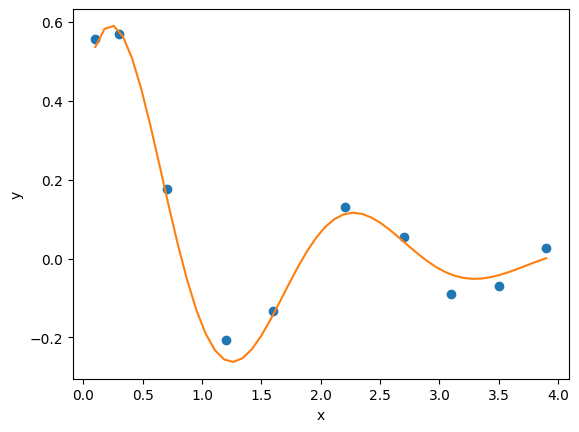

In [19]:
plt.plot(x,y,'o')
plt.plot(t,F(t))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Aufgabe c)
Lösen Sie die Aufgabe b) nochmals mit dem gedämpften Gauss-Newton Verfahren.

- Gauss-Newton-Verfahren mit QR-Zerlegung, diesmal mit Dämpfung. Die Inputvariablen sind:
    - g: die Funktion g von oben
    - Dg: die Jacobi-Matrix
    - lam0: der Startvektor für die Parameter
    - tol: die Fehlerschranke
    - max_iter: die max. Anzahl Iterationen, die durchgeführt werden sollen
    - pmax: obere Grenze für p der Dämpfung (sieh Skript)
    - damping: True, sofern das gedämpfte Verfahren angewendet werden soll (False, für das ungedämpfte Verfahren) 
- Füllen Sie den fehlenen Code für die Dämpfung noch aus.



In [30]:
def gauss_newton_d(g, Dg, lam0, tol, max_iter, pmax, damping):
    k=0
    lam=np.copy(lam0)
    increment = tol+1
    err_func = np.linalg.norm(g(lam))**2
    
    while k < max_iter and increment > tol:
        # QR-Zerlegung von Dg(lam)
        [Q,R] = np.linalg.qr(Dg(lam))
        delta = np.linalg.solve(R,-Q.T@g(lam)).flatten()                                                  # Achtung: flatten() braucht es, um aus dem Spaltenvektor delta wieder
                                                                     # eine "flachen" Vektor zu machen, da g hier nicht mit Spaltenvektoren als Input umgehen kann           
        # hier kommt die Däfmpfung, falls damping = 1
        p=0
        
        while damping == 1 and p < pmax and np.linalg.norm(g(lam + delta / (2 ** p))) ** 2 >= err_func:
            p += 1

            
               
        # Update des Vektors Lambda        
        lam = lam + delta / (2**p)
        err_func = np.linalg.norm(g(lam)) ** 2
        increment = np.linalg.norm(delta)
        k = k+1
        print('Iteration: ',k)
        print('lambda = ',lam)
        print('Inkrement = ',increment)
        print('Fehlerfunktional =', err_func)
    return(lam,k)

In [31]:
tol = 1e-5
max_iter = 30
pmax = 5
damping = 1
[lam_with,n] = gauss_newton_d(g, Dg, lam0, tol, max_iter, pmax, damping)


Iteration:  1
lambda =  [0.95511831 1.51360561 4.12751857 0.02958613]
Inkrement =  2.3888558358777257
Fehlerfunktional = 0.11737176539512977
Iteration:  2
lambda =  [0.94903131 1.64246017 2.83165009 0.46474995]
Inkrement =  1.3730561571200173
Fehlerfunktional = 0.04958197184289552
Iteration:  3
lambda =  [0.61135825 0.59382995 3.22167066 0.65774938]
Inkrement =  1.1844886038259845
Fehlerfunktional = 0.02906716546490773
Iteration:  4
lambda =  [0.71657742 0.76871341 3.11046664 0.59709701]
Inkrement =  0.24020895685101218
Fehlerfunktional = 0.00849010121071578
Iteration:  5
lambda =  [0.73134923 0.78731385 3.068876   0.61048515]
Inkrement =  0.049731339749952704
Fehlerfunktional = 0.007941206414104202
Iteration:  6
lambda =  [0.73563357 0.79604644 3.07729169 0.60237064]
Inkrement =  0.015207984110189754
Fehlerfunktional = 0.00792841341866262
Iteration:  7
lambda =  [0.73506742 0.79565404 3.07370202 0.60483408]
Inkrement =  0.004407811277889156
Fehlerfunktional = 0.00792741435413575
Itera

Tatsächlich wirkt sich die Dämpfung bei diesem Startvektor nicht aus. 

- Graphische Darstellung

In [32]:
t = sp.symbols('t')
F = f(t,lam_with)
F


In [33]:
F = sp.lambdify([t],F,'numpy')
t = np.linspace(x.min(),x.max())

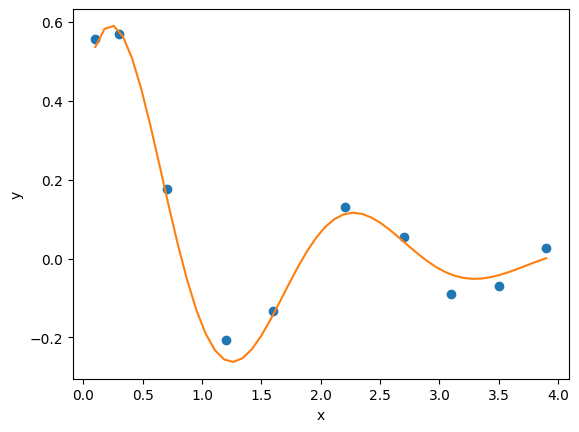

In [34]:
plt.plot(x,y,'o')
plt.plot(t,F(t))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Aufgabe d)
Vergleichen Sie die Resultate aus b) und c) für einen anderen Startvektor $\lambda^{(0)}=(2,2,2,2)^{T}$

In [35]:
lam0_new = np.array([2, 2, 2, 2],dtype=np.float64)


In [38]:
# rufen Sie hier das Gauss-Newton Verfahren ohne Dämpfung auf
[lam_without,n] = gauss_newton(g, Dg, lam0_new, tol, max_iter)

Iteration:  1
lambda =  [-0.30052249  0.97347742  2.37010821  1.3359894 ]
Inkrement =  2.631357538873067
Fehlerfunktional = 1.476589773754073
Iteration:  2
lambda =  [ 0.60133027  1.13790001 -0.10031524  3.8259477 ]
Inkrement =  3.6253630933677936
Fehlerfunktional = 1.6583053367781062
Iteration:  3
lambda =  [  828.8023408    -95.5527519    150.93861428 -1122.16685165]
Inkrement =  1409.2333158237736
Fehlerfunktional = inf
Iteration:  4
lambda =  [ 7.95807864e-13 -9.55527519e+01  1.50938614e+02 -1.12216685e+03]
Inkrement =  828.8023407958955
Fehlerfunktional = 8.769264975393066e+298
Iteration:  5
lambda =  [ 8.07793567e-28 -9.55527519e+01  1.50938614e+02 -1.12216685e+03]
Inkrement =  7.958079101856617e-13
Fehlerfunktional = 9.035402849451738e+268


In [37]:
# rufen Sie hier das Gauss-Newton Verfahren mit Dämpfung auf
[lam_with_d,n_d] = gauss_newton_d(g, Dg, lam0_new, tol, max_iter, pmax, damping)

Iteration:  1
lambda =  [0.84973875 1.48673871 2.18505411 1.6679947 ]
Inkrement =  2.631357538873067
Fehlerfunktional = 0.12813271329754403
Iteration:  2
lambda =  [0.51622071 0.99758326 2.94820682 0.88808392]
Inkrement =  2.4828775467032203
Fehlerfunktional = 0.09496774575919793
Iteration:  3
lambda =  [0.7197636  0.71323834 3.14257272 0.43131548]
Inkrement =  0.6072044580770103
Fehlerfunktional = 0.018979764405643126
Iteration:  4
lambda =  [0.71554041 0.76252212 3.06743155 0.61215612]
Inkrement =  0.2019808391230637
Fehlerfunktional = 0.008194118633763691
Iteration:  5
lambda =  [0.73476802 0.7927067  3.08062645 0.60091132]
Inkrement =  0.039766331183686485
Fehlerfunktional = 0.007935037650716284
Iteration:  6
lambda =  [0.73464029 0.79459835 3.07321467 0.60542124]
Inkrement =  0.00888079093649082
Fehlerfunktional = 0.007927815748250263
Iteration:  7
lambda =  [0.73544017 0.79623306 3.07509282 0.60378702]
Inkrement =  0.0030838568915519293
Fehlerfunktional = 0.0079273471303585
Itera

Man sieht: für diesen neuen Startvektor divergiert das Gauss-Newton Verfahren ohne Dämpfung, während es mit Dämpfung  konvergiert.

### Aufgabe e)
Probieren Sie die Python-Funktion scypy.optimize.fmin() (siehe [Online-Dokumentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html), indem Sie damit direkt das Minimum des Fehlerfunktionals suchen, und vergleichen Sie mit Ihrer Lösung aus d).

In [40]:
import scipy.optimize

def err_func(x):
    return np.linalg.norm(g(x)) ** 2 # fügen Sie den richtigen Rückgabewert ein

xopt = scipy.optimize.fmin(err_func, lam0_new)

xopt

Optimization terminated successfully.
         Current function value: 0.007927
         Iterations: 151
         Function evaluations: 258


array([0.73534956, 0.79616979, 3.0745151 , 0.6041771 ])